In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


## Set model and resolution parameters

In [2]:
train_mu0 = 0.
train_mu1 = 1.
train_rho01 = -0.6

train_sig0 = 1.0
train_sig1 = 1.5

train_cov00 = train_sig0 * train_sig0 
train_cov11 = train_sig1 * train_sig1
train_cov01 = train_rho01 * train_sig0 * train_sig1

train_cov = np.array( [[train_cov00, train_cov01], [train_cov01, train_cov11]] )
train_mu = np.array( [train_mu0, train_mu1])



true_mu0 = 0.2
true_mu1 = 0.8
true_rho01 = -0.6

true_sig0 = 0.9
true_sig1 = 1.3

true_cov00 = true_sig0 * true_sig0 
true_cov11 = true_sig1 * true_sig1
true_cov01 = true_rho01 * true_sig0 * true_sig1

true_cov = np.array( [[true_cov00, true_cov01], [true_cov01, true_cov11]] )
true_mu = np.array( [true_mu0, true_mu1])



#--- resolution is in same dimensions as features (not sigma/val)
res0 = 0.5
res1 = 0.8




## Plots to visualize these parameter choices

In [3]:
#ngen = 100000
ngen = 400000

train_pts = np.random.multivariate_normal(train_mu, train_cov, size=ngen)
true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen)

train_det_pts = np.random.normal( train_pts, [res0, res1])

true_det_pts = np.random.normal( true_pts, [res0, res1])



<function matplotlib.pyplot.show(close=None, block=None)>

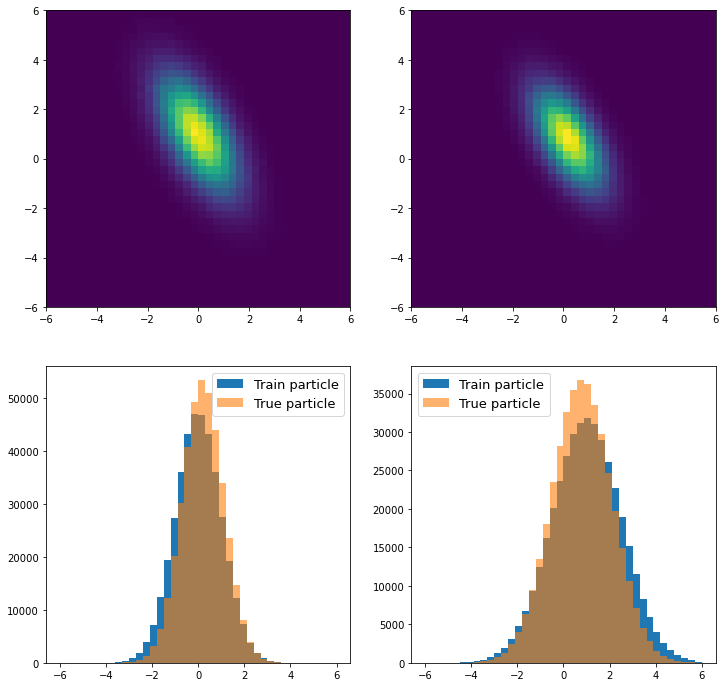

In [4]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='Train particle' )
ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='True particle', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='Train particle' )
ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='True particle', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

In [5]:
train_diff = train_det_pts - train_pts

In [6]:
diff_cov = np.cov( train_diff.T )

In [7]:
diff_cov

array([[2.50265962e-01, 3.78325429e-04],
       [3.78325429e-04, 6.39886592e-01]])

In [8]:
np.sqrt(diff_cov[0,0])

0.5002658912739419

In [9]:
np.sqrt(diff_cov[1,1])

0.7999291166059682

<function matplotlib.pyplot.show(close=None, block=None)>

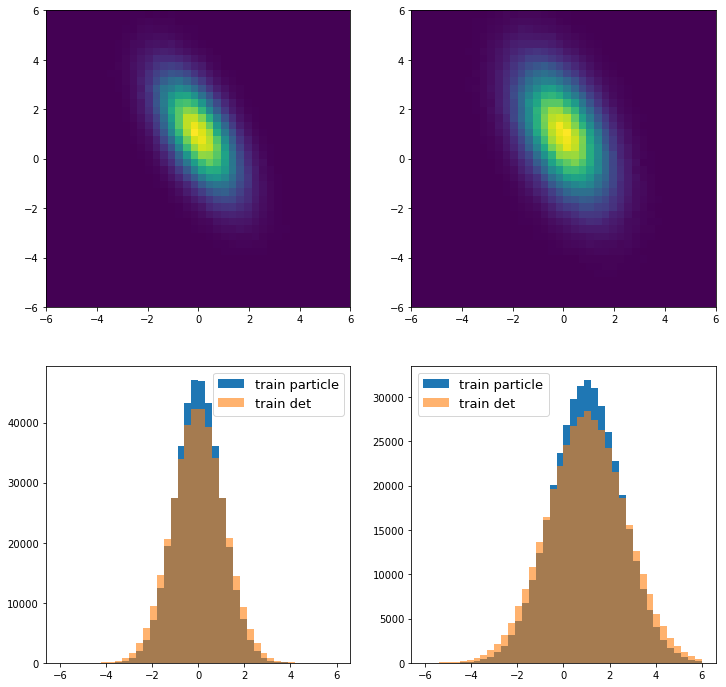

In [10]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

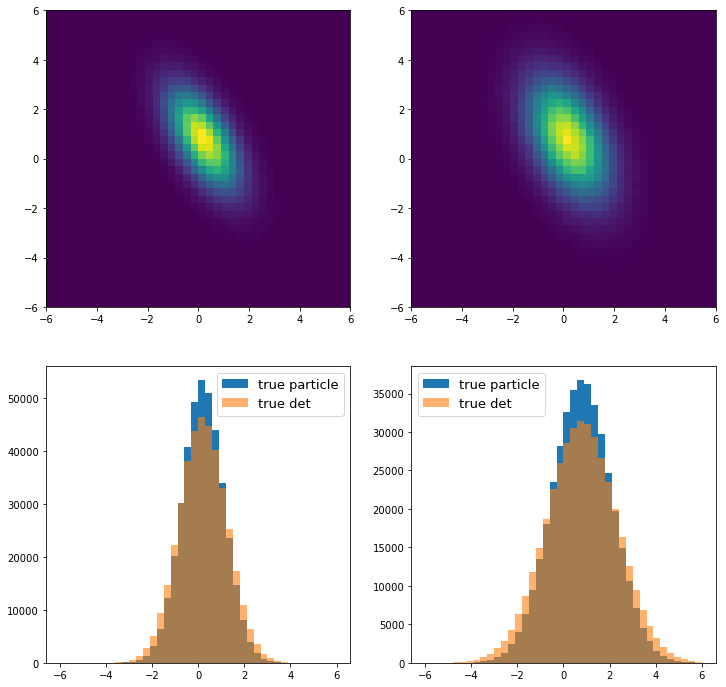

In [11]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)

ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

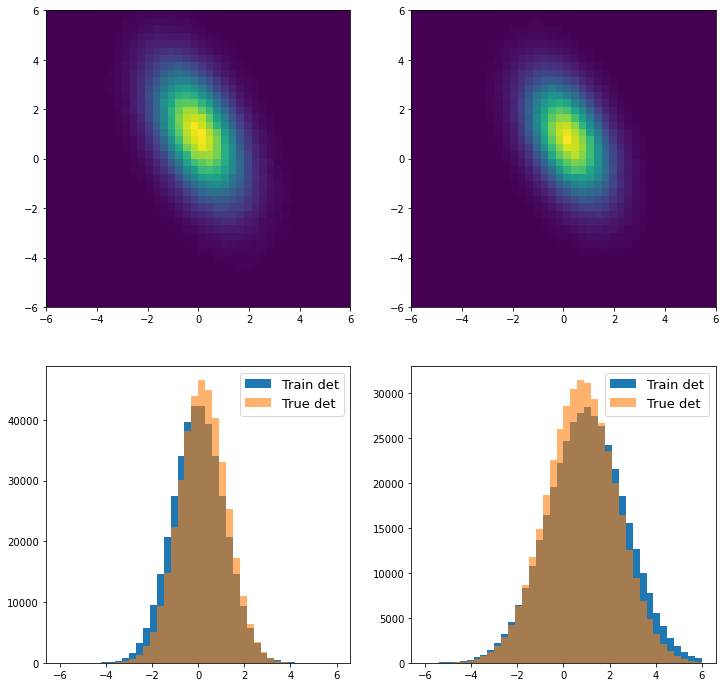

In [12]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='Train det' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='True det', alpha=0.6)

ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='Train det' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='True det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

## Set up NN model for OmniFold

In [13]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

2023-10-25 12:53:56.741106: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-25 12:53:56.741335: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-25 12:53:56.757725: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-25 12:53:56.757966: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-25 12:53:56.758140: I tensorflow/compiler/xla/stream_executo

## Package the training data for OmniFold

In [14]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

## Run OmniFold

In [15]:
%%time


verbose = True

of_niter = 4

of_weights = of.omnifold( train_both, true_det_pts, of_niter, model, verbose)


ITERATION: 1

   -- ITERATION 1  STEP 1

Epoch 1/20


2023-10-25 12:53:58.822525: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-25 12:53:58.824401: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fb5f837d480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-25 12:53:58.824413: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-25 12:53:58.824416: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-25 12:53:58.827883: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-25 12:53:58.911973: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is log

60/60 [==============================] - 2s 5ms/step - loss: 0.6881 - accuracy: 0.5111 - val_loss: 0.6851 - val_accuracy: 0.5702
Epoch 2/20
60/60 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5835 - val_loss: 0.6845 - val_accuracy: 0.5891
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5890 - val_loss: 0.6845 - val_accuracy: 0.5661
Epoch 4/20
60/60 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5882 - val_loss: 0.6843 - val_accuracy: 0.5853
Epoch 5/20
60/60 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5905 - val_loss: 0.6844 - val_accuracy: 0.5754
Epoch 6/20
60/60 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5874 - val_loss: 0.6844 - val_accuracy: 0.5757
Epoch 7/20
60/60 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5877 - val_loss: 0.6844 - val_accuracy: 0.5754
Epoch 8/20
60/60 [=============

Epoch 18/20
60/60 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.4467 - val_loss: 0.6883 - val_accuracy: 0.4451
Epoch 19/20
60/60 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.4464 - val_loss: 0.6883 - val_accuracy: 0.4482
Epoch 20/20
40/40 [==============================] - 0s 562us/step

   -- ITERATION 2  STEP 2

Epoch 1/20
300/300 [==============================] - 2s 3ms/step - loss: 0.6840 - accuracy: 0.3916 - val_loss: 0.6843 - val_accuracy: 0.3931
Epoch 2/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.3923 - val_loss: 0.6843 - val_accuracy: 0.3964
Epoch 3/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.3927 - val_loss: 0.6843 - val_accuracy: 0.3918
Epoch 4/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.3927 - val_loss: 0.6843 - val_accuracy: 0.3882
Epoch 5/20
300/300 [==============================] - 1

Epoch 14/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6832 - accuracy: 0.3901 - val_loss: 0.6832 - val_accuracy: 0.3943
Epoch 15/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6832 - accuracy: 0.3894 - val_loss: 0.6833 - val_accuracy: 0.3974
Epoch 16/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6832 - accuracy: 0.3909 - val_loss: 0.6831 - val_accuracy: 0.3893
Epoch 17/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6832 - accuracy: 0.3908 - val_loss: 0.6831 - val_accuracy: 0.3936
Epoch 18/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6832 - accuracy: 0.3904 - val_loss: 0.6832 - val_accuracy: 0.3867
Epoch 19/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6832 - accuracy: 0.3909 - val_loss: 0.6831 - val_accuracy: 0.3907
Epoch 20/20
40/40 [==============================] - 0s 594us/step

ITERATION: 4

   -- ITERATION 4  STEP 1

Epoch 1/20
60/60 [===============

In [16]:
of_weights

array([[[1.09765887, 0.91498822, 0.90717274, ..., 1.25344145,
         1.067981  , 0.80869985],
        [0.71719259, 0.86324096, 1.00779843, ..., 1.20693839,
         1.06914639, 0.76147044]],

       [[0.7587719 , 0.88352978, 1.00099289, ..., 1.321015  ,
         1.09004617, 0.74438137],
        [0.67739522, 0.88093513, 1.0313313 , ..., 1.26514471,
         1.12011707, 0.74691677]],

       [[0.69002384, 0.89211035, 1.01612806, ..., 1.33983707,
         1.10209751, 0.74040544],
        [0.64079005, 0.85183841, 0.98973888, ..., 1.27471387,
         1.12748325, 0.71351349]],

       [[0.6499477 , 0.87615132, 1.01466787, ..., 1.30923486,
         1.12363029, 0.73837364],
        [0.65965825, 0.85320085, 0.98476636, ..., 1.27151859,
         1.12443507, 0.73211074]]])

In [17]:
np.shape( of_weights)

(4, 2, 400000)

<function matplotlib.pyplot.show(close=None, block=None)>

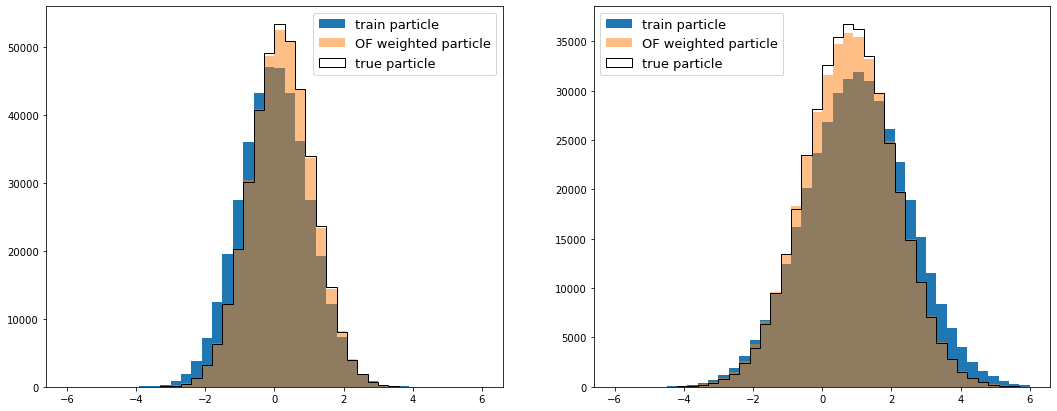

In [18]:
fig,ax = plt.subplots( 1, 2, figsize=(18,7))

hmin=-6
hmax=6
hbins=40



ax[0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[0].hist( train_pts[:,0], weights=of_weights[3,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
ax[0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )

ax[1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1].hist( train_pts[:,1], weights=of_weights[3,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
ax[1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )


ax[0].legend(loc='best', fontsize=13)
ax[1].legend(loc='best', fontsize=13)



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

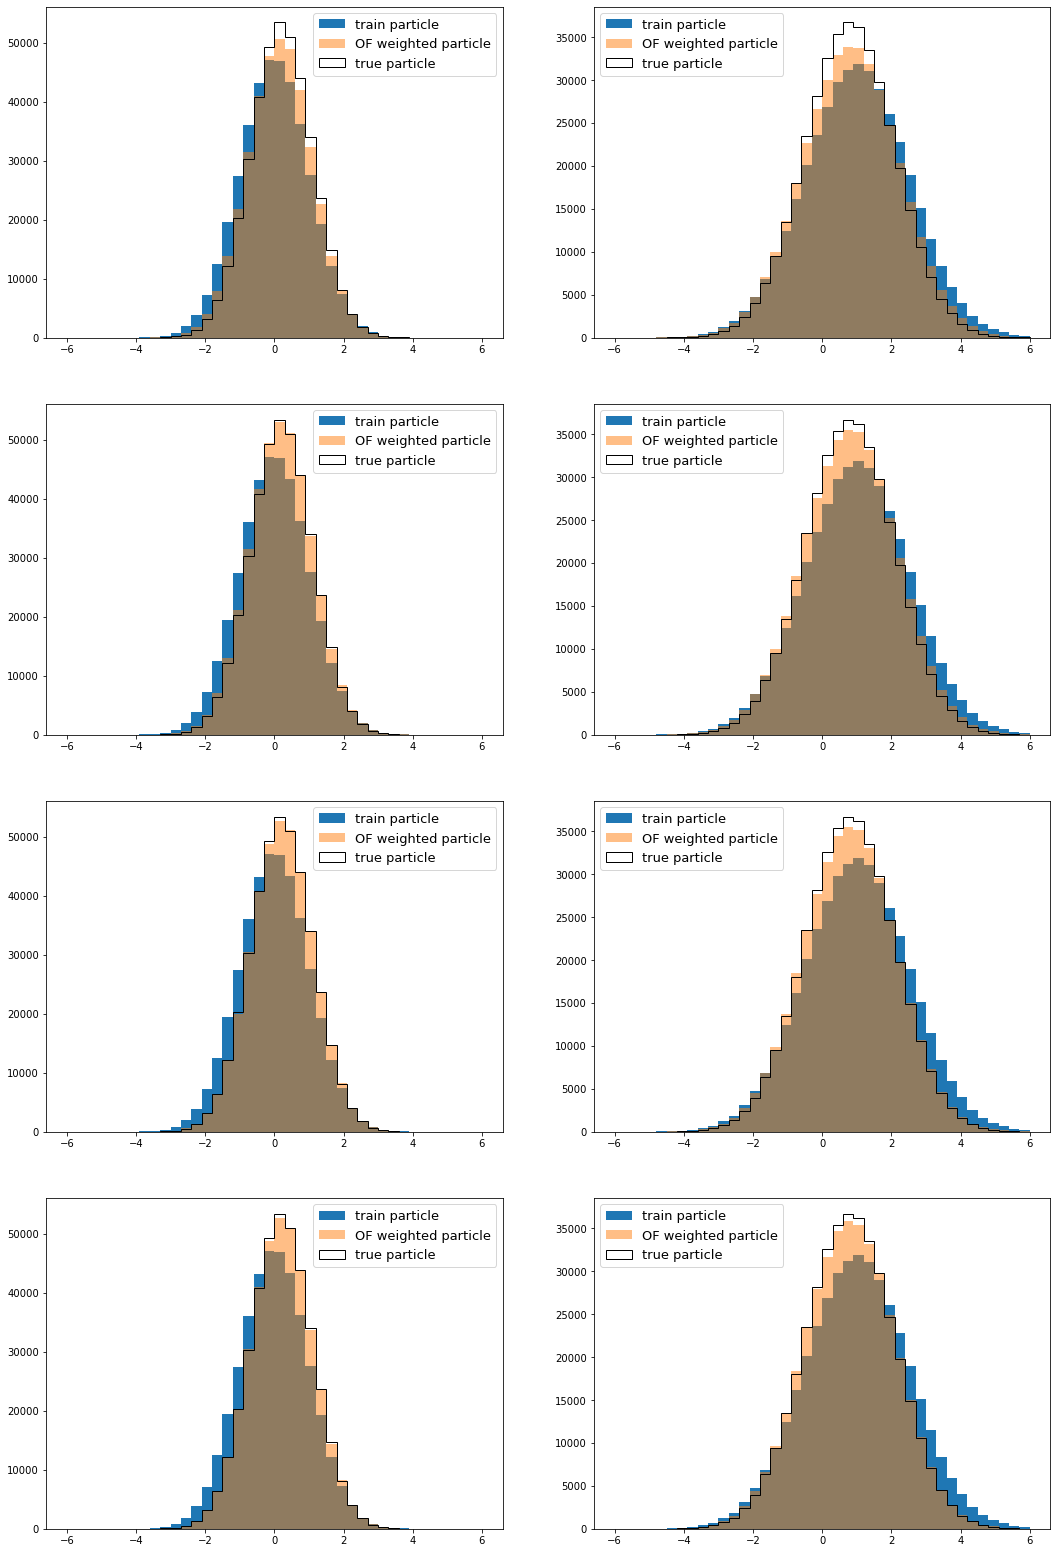

In [19]:


fig,ax = plt.subplots( of_niter, 2, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
    ax[ofi][0].hist( train_pts[:,0], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
    ax[ofi][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )

    ax[ofi][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
    ax[ofi][1].hist( train_pts[:,1], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
    ax[ofi][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )


    ax[ofi][0].legend(loc='best', fontsize=13)
    ax[ofi][1].legend(loc='best', fontsize=13)



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

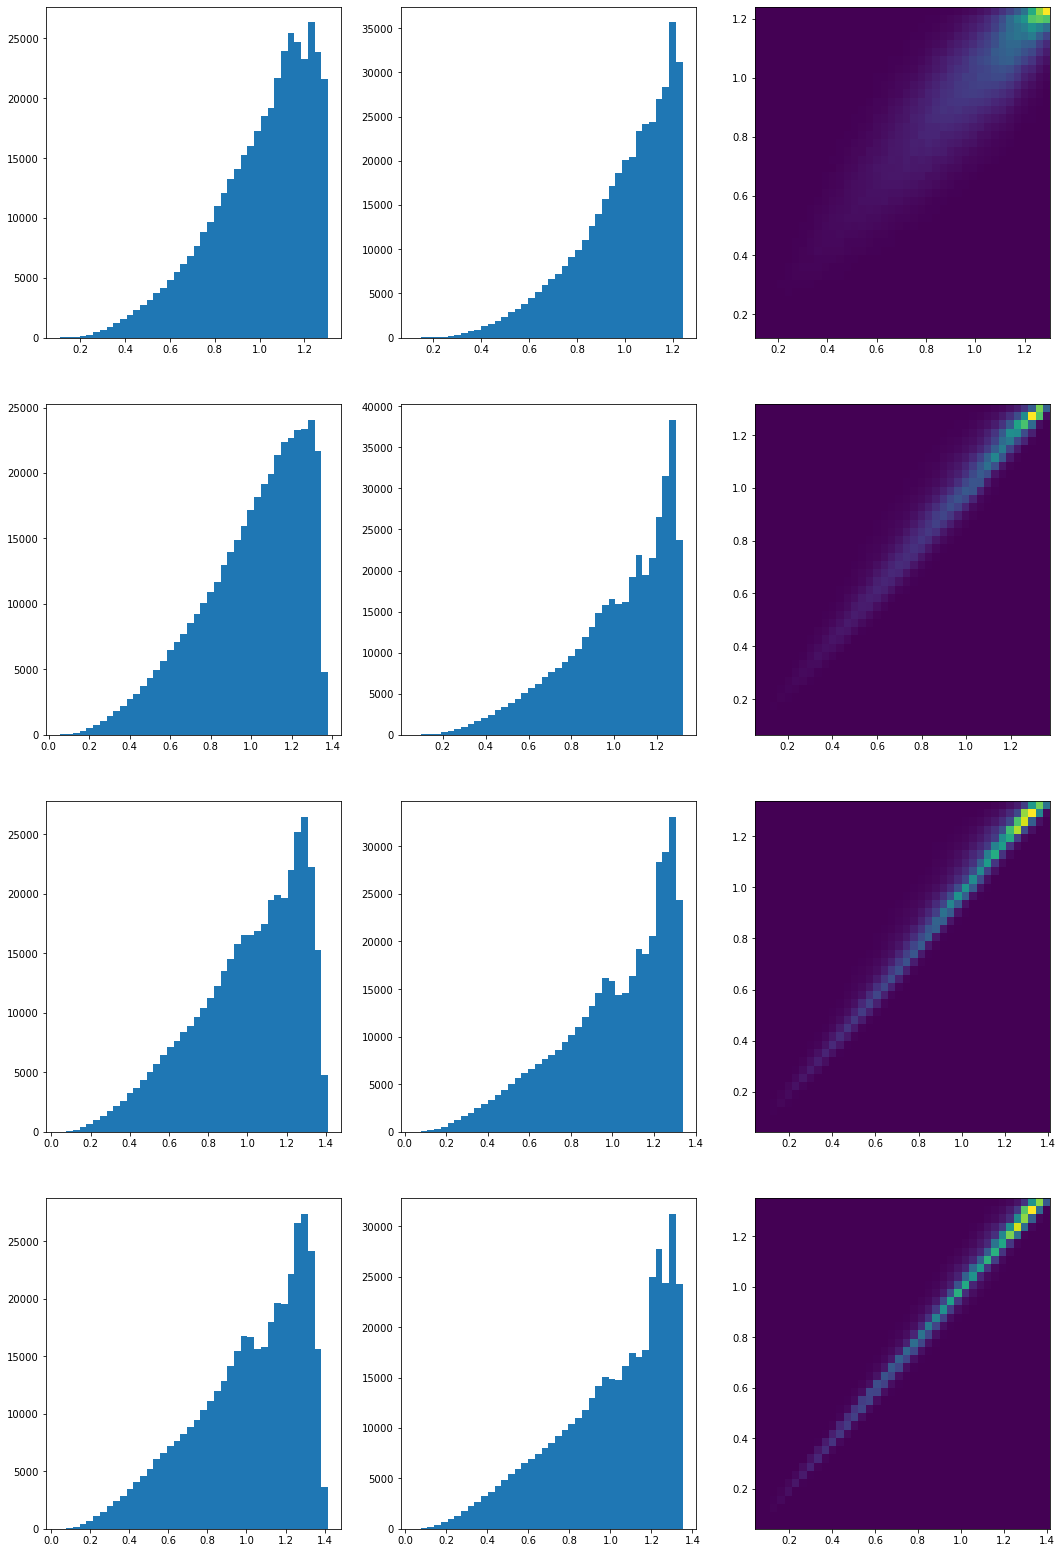

In [20]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( of_weights[ofi,0,:], bins=hbins )
    ax[ofi][1].hist( of_weights[ofi,1,:], bins=hbins )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

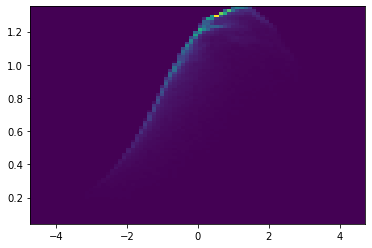

In [21]:
plt.hist2d( train_pts[:,0], of_weights[3,1,:], bins=[80,80])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

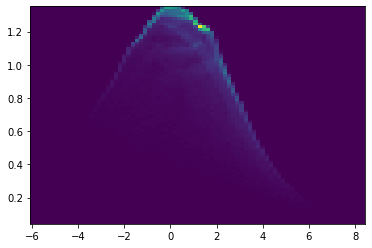

In [22]:
plt.hist2d( train_pts[:,1], of_weights[3,1,:], bins=[80,80])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

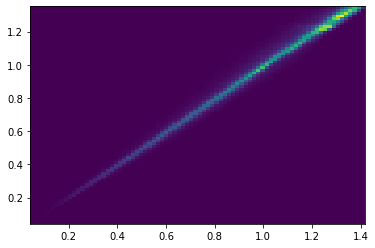

In [23]:
plt.hist2d( of_weights[3,0,:], of_weights[3,1,:], bins=[80,80])
plt.show